In [ ]:
import os
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = '../data/'
VAR_EXP_FILE = os.path.join(DATA_DIR, 'variant_effects/variant_effects_expression.bed')
VAR_DIS_FILE = os.path.join(DATA_DIR, 'variant_effects/variant_effects_disease.bed')

def compute_SNP_types(df):
    df['alt_type'] = np.where((df['alt'] == 'A') | (df['alt'] == 'G'), 'purine', 'pyrimidine')
    df['ref_type'] = np.where((df['ref'] == 'A') | (df['ref'] == 'G'), 'purine', 'pyrimidine')

    df['SNP_type'] = np.where(df['alt_type'] == df['ref_type'], 'transition', 'transversion')

    df['SNP'] = df['ref']+'-'+df['alt']


# Variant effects expression

In [165]:
var_exp_df = pd.read_csv(VAR_EXP_FILE, sep='\t', header=0)
var_exp_df.head()

,chromosome,start,end,ref,alt,split,label,Consequence,actual
0,chr1,1055036,1055036,T,C,train,1,3_prime_UTR_variant,T
1,chr1,1070425,1070425,C,T,train,1,downstream_gene_variant,C
2,chr1,1095184,1095184,C,T,train,1,intron_variant,C
3,chr1,1189282,1189282,G,A,train,1,intron_variant,G
4,chr1,1190172,1190172,A,T,train,1,intron_variant,A


Labels indicate wheter the SNP (single nucleotide polymorphisms) has an effect on gene expression (1) or is genetic background variation (0)

In [166]:
var_exp_df['label'].value_counts()

label
0    97326
1     7937
Name: count, dtype: int64

In [167]:
var_exp_df['chromosome'].value_counts()

chromosome
chr1     80214
chr10    25048
chr9         1
Name: count, dtype: int64

In [168]:
var_exp_df.groupby('chromosome')['label'].value_counts()

chromosome  label
chr1        0        73309
            1         6905
chr10       0        24016
            1         1032
chr9        0            1
Name: count, dtype: int64

In [169]:
var_exp_df['Consequence'].value_counts()

Consequence
intron_variant                         60712
intergenic_variant                     23218
upstream_gene_variant                   6339
downstream_gene_variant                 4581
regulatory_region_variant               4010
non_coding_transcript_exon_variant      3099
3_prime_UTR_variant                     2025
5_prime_UTR_variant                      462
TF_binding_site_variant                  433
splice_region_variant                    129
splice_polypyrimidine_tract_variant      103
missense_variant                          60
splice_donor_region_variant               31
synonymous_variant                        24
splice_donor_variant                      15
splice_donor_5th_base_variant             13
splice_acceptor_variant                    5
stop_lost                                  2
mature_miRNA_variant                       2
Name: count, dtype: int64

### Distribution of SNP types
Single Base-Pair Substitution involves the replacement of a single nucleotide base in DNA or RNA with another.
- *Tansition*
When a nucleotide is substituted by the another of the same type:
    - A → G or G→A (purine type)
    - T → C or C→T (pyrimidine type)
- *Transversion*
When a nucleotide of one type is substituted by one of the other type. IE:
    - A → T (purine to pyrimidine)

In [170]:
compute_SNP_types(var_exp_df)
var_exp_df['SNP_type'].value_counts()

SNP_type
transition      72202
transversion    33061
Name: count, dtype: int64

In [171]:
var_exp_df['SNP'].value_counts()

SNP
G-A    19186
C-T    19039
T-C    17052
A-G    16925
C-A     4531
G-C     4476
G-T     4438
C-G     4340
T-G     4094
A-C     4044
T-A     3610
A-T     3528
Name: count, dtype: int64

In [172]:
var_exp_df['type_label'] = var_exp_df['SNP_type'] + ' - ' + var_exp_df['label'].astype(str)
var_exp_df

,chromosome,start,end,ref,alt,split,label,Consequence,actual,alt_type,ref_type,SNP_type,SNP,type_label
0,chr1,1055036,1055036,T,C,train,1,3_prime_UTR_variant,T,pyrimidine,pyrimidine,transition,T-C,transition - 1
1,chr1,1070425,1070425,C,T,train,1,downstream_gene_variant,C,pyrimidine,pyrimidine,transition,C-T,transition - 1
2,chr1,1095184,1095184,C,T,train,1,intron_variant,C,pyrimidine,pyrimidine,transition,C-T,transition - 1
3,chr1,1189282,1189282,G,A,train,1,intron_variant,G,purine,purine,transition,G-A,transition - 1
4,chr1,1190172,1190172,A,T,train,1,intron_variant,A,pyrimidine,purine,transversion,A-T,transversion - 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105258,chr10,67932572,67932572,T,C,train,0,intron_variant,T,pyrimidine,pyrimidine,transition,T-C,transition - 0
105259,chr10,67945376,67945376,A,G,train,0,intron_variant,A,purine,purine,transition,A-G,transition - 0
105260,chr10,67959643,67959643,A,C,train,0,intron_variant,A,pyrimidine,purine,transversion,A-C,transversion - 0
105261,chr10,67963971,67963971,G,T,train,0,intron_variant,G,pyrimidine,purine,transversion,G-T,transversion - 0


<Axes: xlabel='SNP', ylabel='count'>

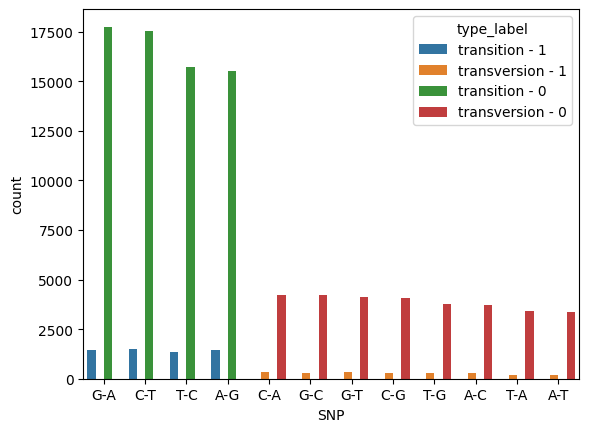

In [173]:
sns.countplot(data=var_exp_df, x='SNP', hue='type_label', order=var_exp_df['SNP'].value_counts().index)

<Axes: xlabel='SNP', ylabel='count'>

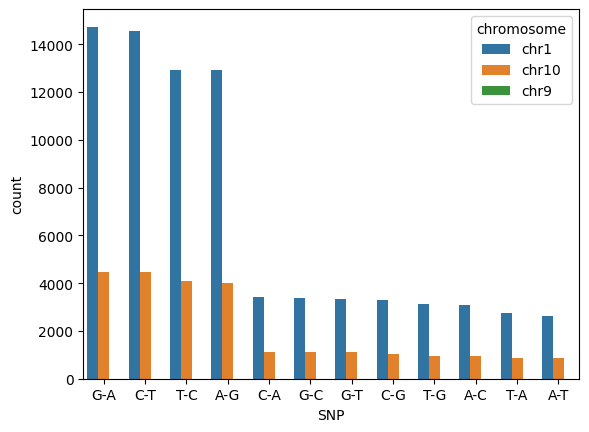

In [174]:
sns.countplot(data=var_exp_df, x='SNP', hue='chromosome', order=var_exp_df['SNP'].value_counts().index)

### Does the SNP type influence the variant effect on gene expression?

Text(0.5, 1.0, 'SNP type distribution')

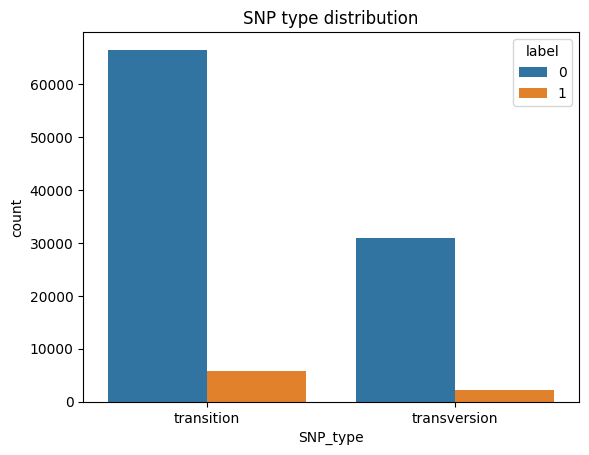

In [175]:
sns.countplot(data=var_exp_df, x='SNP_type', hue='label')
plt.title('SNP type distribution')

In [176]:
import scipy.stats as stats 

transition_1 = len(var_exp_df[(var_exp_df['SNP_type'] == 'transition') & var_exp_df['label']==1])
transition_0 = len(var_exp_df[(var_exp_df['SNP_type'] == 'transition') & var_exp_df['label']==0])
transversion_1 = len(var_exp_df[(var_exp_df['SNP_type'] == 'transversion') & var_exp_df['label']==1])
transversion_0 = len(var_exp_df[(var_exp_df['SNP_type'] == 'transversion') & var_exp_df['label']==0])

contingency_table = [[transition_1, transition_0],[transversion_1, transversion_0]]

# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(contingency_table)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 2.6725828799511873
p_value is : 0.0


# Variant effect disease

In [177]:
var_dis_df = pd.read_csv(VAR_DIS_FILE, sep='\t', header=0)
var_dis_df.head()

,chromosome,start,end,ref,alt,split,label,full_label,Consequence
0,chr1,926024,926024,G,A,train,0,Likely benign,intron_variant
1,chr1,926025,926025,G,A,train,0,Likely benign,intron_variant
2,chr1,926026,926026,C,T,train,0,Likely benign,intron_variant
3,chr1,926028,926028,C,T,train,0,Likely benign,intron_variant
4,chr1,930135,930135,T,C,train,0,Likely benign,intron_variant


In [178]:
var_dis_df['label'].value_counts()

label
0    274037
1     21458
Name: count, dtype: int64

In [179]:
var_dis_df['chromosome'].value_counts()

chromosome
chr2     26606
chr1     25752
chr11    17178
chr17    16887
chr3     16419
chr9     15131
chr5     14993
chr16    14806
chr19    14634
chr7     14189
chr12    13780
chr6     13445
chr10    12222
chr15    10851
chrX     10636
chr4     10367
chr8      9427
chr14     9158
chr22     6932
chr20     6373
chr18     6001
chr13     5504
chr21     4054
chrY       150
Name: count, dtype: int64

In [180]:
compute_SNP_types(var_dis_df)
var_dis_df


,chromosome,start,end,ref,alt,split,label,full_label,Consequence,alt_type,ref_type,SNP_type,SNP
0,chr1,926024,926024,G,A,train,0,Likely benign,intron_variant,purine,purine,transition,G-A
1,chr1,926025,926025,G,A,train,0,Likely benign,intron_variant,purine,purine,transition,G-A
2,chr1,926026,926026,C,T,train,0,Likely benign,intron_variant,pyrimidine,pyrimidine,transition,C-T
3,chr1,926028,926028,C,T,train,0,Likely benign,intron_variant,pyrimidine,pyrimidine,transition,C-T
4,chr1,930135,930135,T,C,train,0,Likely benign,intron_variant,pyrimidine,pyrimidine,transition,T-C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295490,chrX,129590144,129590144,G,C,train,1,Likely pathogenic,splice_acceptor_variant,pyrimidine,purine,transversion,G-C
295491,chrX,149490312,149490312,C,G,train,1,Pathogenic,splice_donor_variant,purine,pyrimidine,transversion,C-G
295492,chrX,149490441,149490441,T,C,train,1,Pathogenic,splice_acceptor_variant,pyrimidine,pyrimidine,transition,T-C
295493,chrX,153864819,153864819,C,A,train,1,Likely pathogenic,splice_donor_variant,purine,pyrimidine,transversion,C-A


<Axes: xlabel='SNP', ylabel='count'>

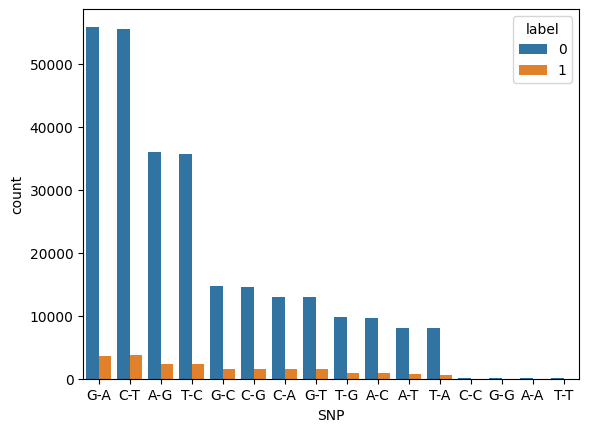

In [181]:
sns.countplot(data=var_dis_df, x='SNP', hue='label', order=var_dis_df['SNP'].value_counts().index)